In [1]:
!nvidia-smi

Tue May 13 19:18:03 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.8/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

import roboflow

roboflow.login()

rf = roboflow.Roboflow()

project = rf.workspace("smartderm-ys1a2").project("smartderm-dq8ae")
dataset = project.version(1).download("folder")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 127.7 MB/s eta 0:00:00
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to SmartDerm-1 in folder:: 100%|██████████| 8427/8427 [00:02<00:00, 3425.41it/s]


In [9]:
!mv {dataset.location}/valid {dataset.location}/val

mv: cannot stat '/content/datasets/SmartDerm-1/valid': No such file or directory


## Custom Training

In [6]:
%cd {HOME}

!yolo task=classify mode=train model=yolov8n-cls.pt data={dataset.location} epochs=50 imgsz=128

/content
100% 5.31M/5.31M [00:00<00:00, 284MB/s]
New https://pypi.org/project/ultralytics/8.3.133 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/datasets/SmartDerm-1, epochs=50, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, class

## Inference with Custom Model

In [11]:
%cd {HOME}
!yolo task=classify mode=predict model={HOME}/runs/classify/train/weights/best.pt conf=0.25 source={dataset.location}/test/Melanoma

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,443,847 parameters, 0 gradients, 3.3 GFLOPs

image 1/48 /content/datasets/SmartDerm-1/test/Melanoma/ISIC_0026045_jpg.rf.887637a7965845e86940034c3f2666f8.jpg: 128x128 Melanoma 0.99, Benign Keratosis 0.01, Melanocytic Nevi 0.00, Actinic Keratosis 0.00, Basal Cell Carcinoma 0.00, 2.9ms
image 2/48 /content/datasets/SmartDerm-1/test/Melanoma/ISIC_0027204_jpg.rf.7b7d5a8c8cb84b3a9336821dfde83218.jpg: 128x128 Melanoma 0.65, Benign Keratosis 0.35, Melanocytic Nevi 0.00, Actinic Keratosis 0.00, Basal Cell Carcinoma 0.00, 2.9ms
image 3/48 /content/datasets/SmartDerm-1/test/Melanoma/ISIC_0027282_jpg.rf.3b78d4cfe8a76831f91d9bc6ac8db752.jpg: 128x128 Melanoma 1.00, Melanocytic Nevi 0.00, Benign Keratosis 0.00, Basal Cell Carcinoma 0.00, Vascular Lesion 0.00, 3.1ms
image 4/48 /content/datasets/SmartDerm-1/test/Melanoma/ISIC_0027552_jpg.rf.2f247131f1044f5a71a74f5886

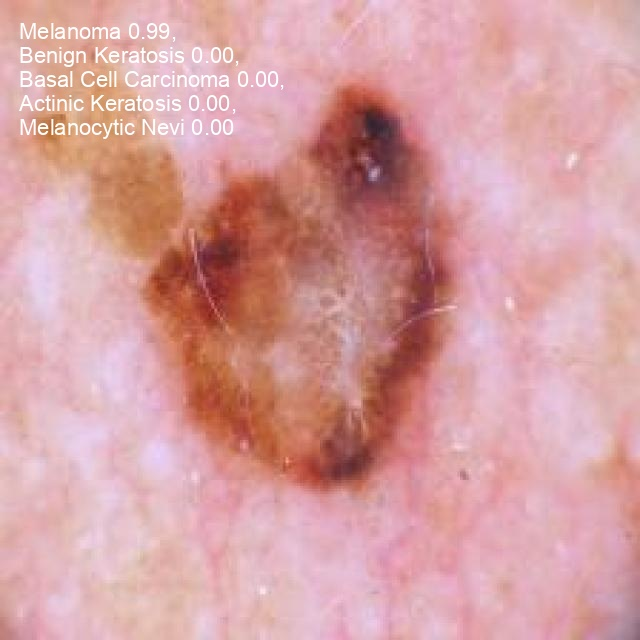

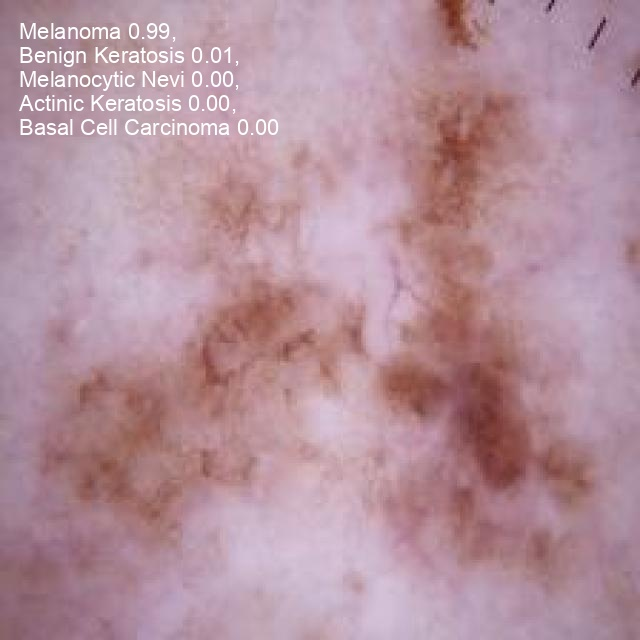

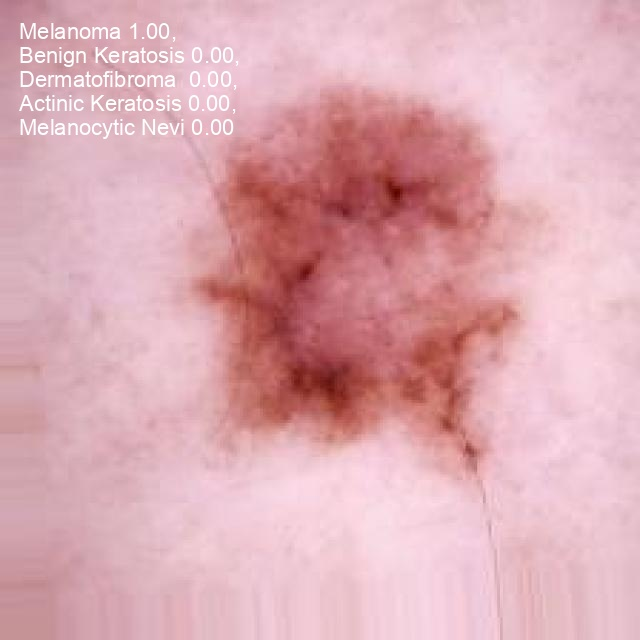

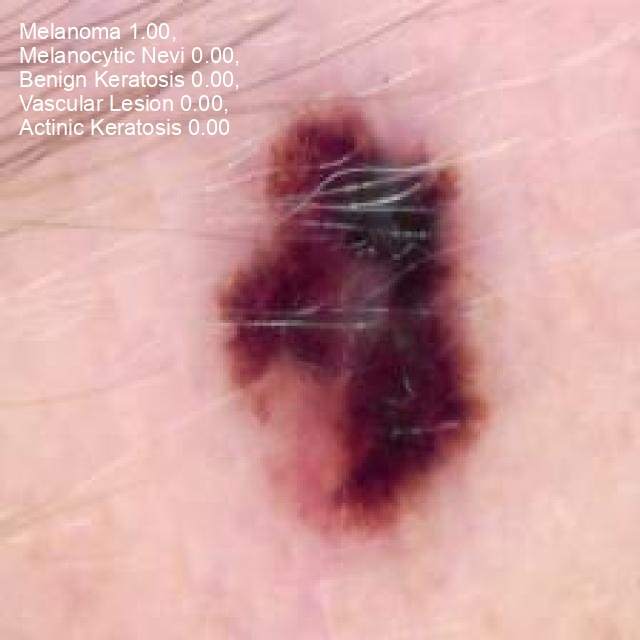

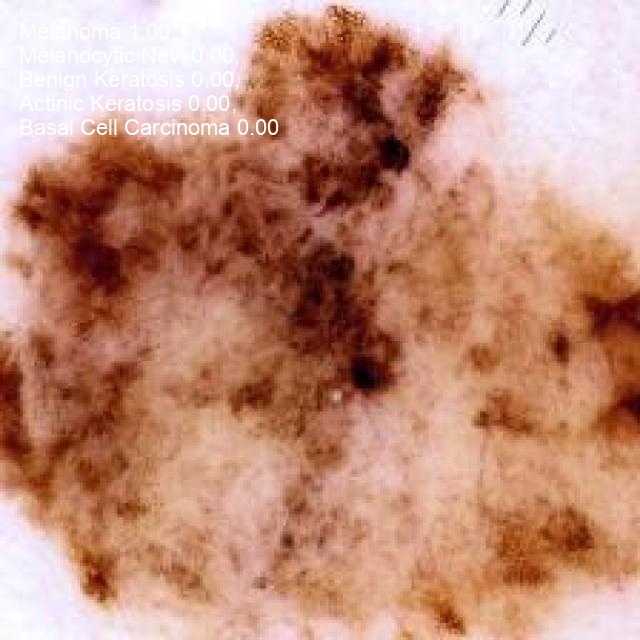

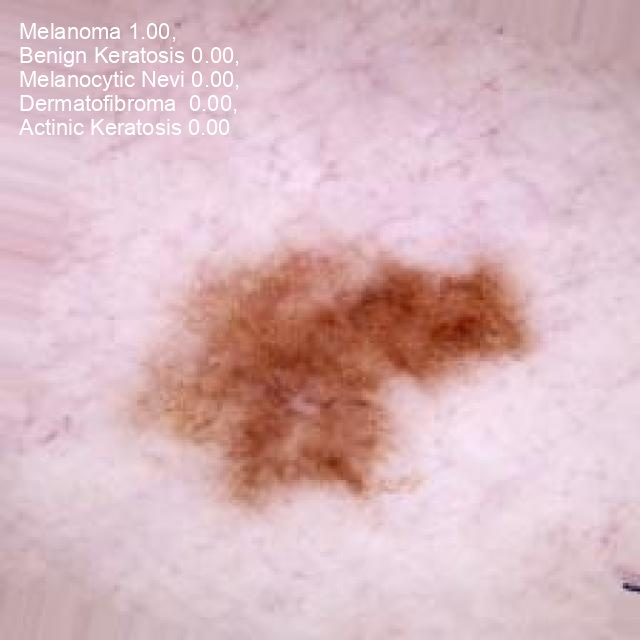

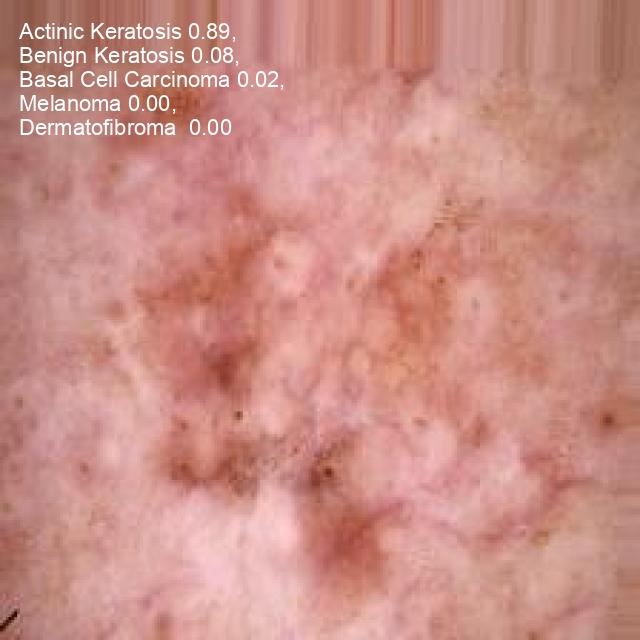

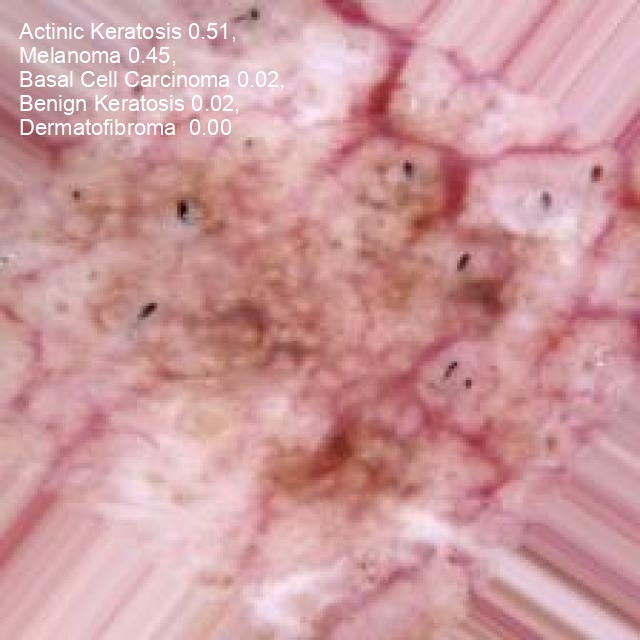

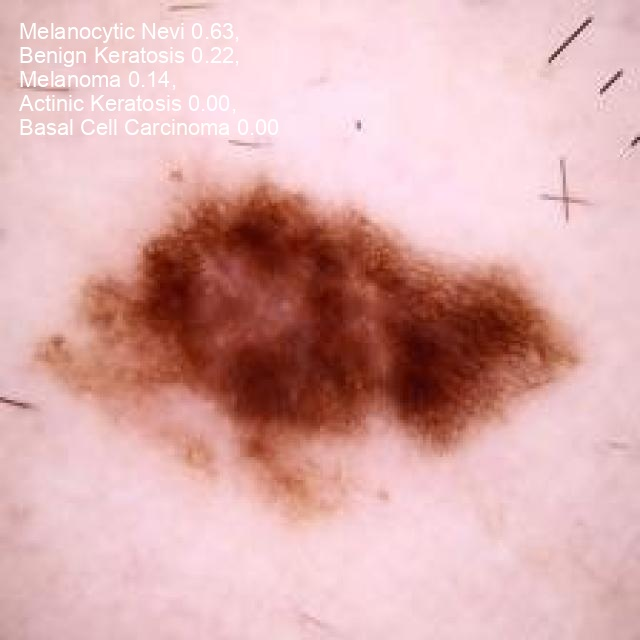

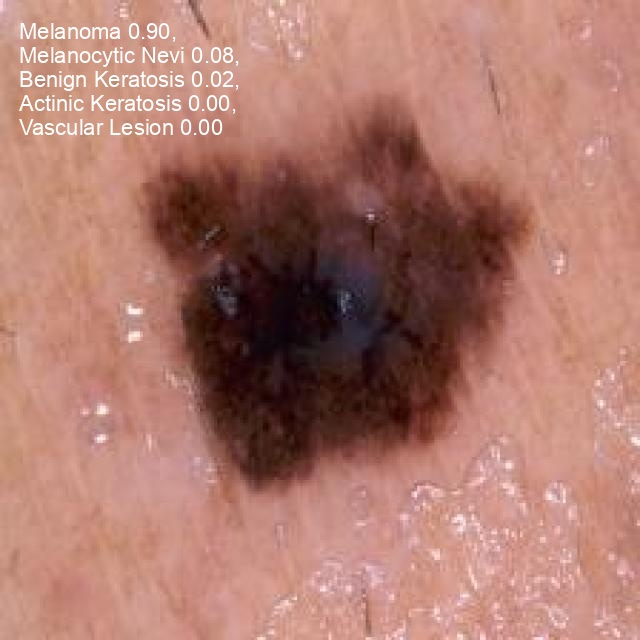

In [12]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/classify/predict/*.jpg')[:10]:
    display(Image(filename=image_path, width=600))
    print("\n")